# Computational Homework #2

**Due by midnight on Friday February 1, 2019. Submit on Canvas**. Answer all of the following problems. These problems should be completed in this notebook (using the R kernel). Computational questions may require code, plots, analysis, interpretation, etc. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. 


## Problem #1

Load ${\tt hubble.txt}$ into R. A description of the variables can be obtained from page 73 of https://cran.r-project.org/web/packages/gamair/gamair.pdf.

In [ ]:
data = read.csv('hubble.csv')
data

Galaxy,y,x
<chr>,<int>,<dbl>
NGC0300,133,2.00
NGC0925,664,9.16
NGC1326A,1794,16.14
NGC1365,1594,17.95
NGC1425,1473,21.88
NGC2403,278,3.22
NGC2541,714,11.22
NGC2090,882,11.75
NGC3031,80,3.63


#### (a) Calculate the 85% confidence interval for the mean of a galaxy's distance from Earth in Mega parsecs in R by doing the computation explicitly.

In [ ]:
#whats our sample size? 
nrow(data)
#its <30 so we will use a t-distribution
#get df
v = nrow(data)-1
alpha = 1-.85
tscore = qt(alpha/2,v)
mu = mean(data$x)
sd = sd(data$x)
CI = vector(mode = "logical", length = 2)
CI[1] = mu+(tscore*(sd/sqrt(nrow(data))))
CI[2] = mu-(tscore*(sd/sqrt(nrow(data))))
CI

[1] 24

[1] 10.28695 13.82222

#### (b) Can you find a built in R function that does this computation automatically? 

In [ ]:
# yes, from Rmisc, the ci function...
install.packages("Rmisc")
library(Rmisc)
CI(data$x,ci=.85)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’


Loading required package: lattice

Loading required package: plyr



upper     mean    lower 
13.82222 12.05458 10.28695

#### (c) Interpret the confidence interval.

From the results above we are 85% certain that the mean if a galaxy's distance from earth in Mega parsecs is between 10.29 and 13.82.

## Problem #2

#### (a) Use ${\tt rbinom()}$ to generate $m = 500$ random numbers from a binomial distribution with $n = 50$ and $p = 0.3$. Store these values in $x$. Describe what $n$ and $p$ are, and state any assumptions needed for the binomial distribution to be an appropriate model.

In [ ]:
x <- rbinom(500,50,0.3)
## n is the number of trials in a given experiment, and p is the 
#probability of success on each trial. the assumption we are making is that the outcomes of this experiment are BINARY!

#### (b) Print a density histogram of $x$. Describe why the distribution looks the way that it does (i.e., why do many values fall near 15, and very few/no values near 0 or 50?). Print the sample mean of $x$. Is it what you might expect? Print the sample standard deviation of $x$.

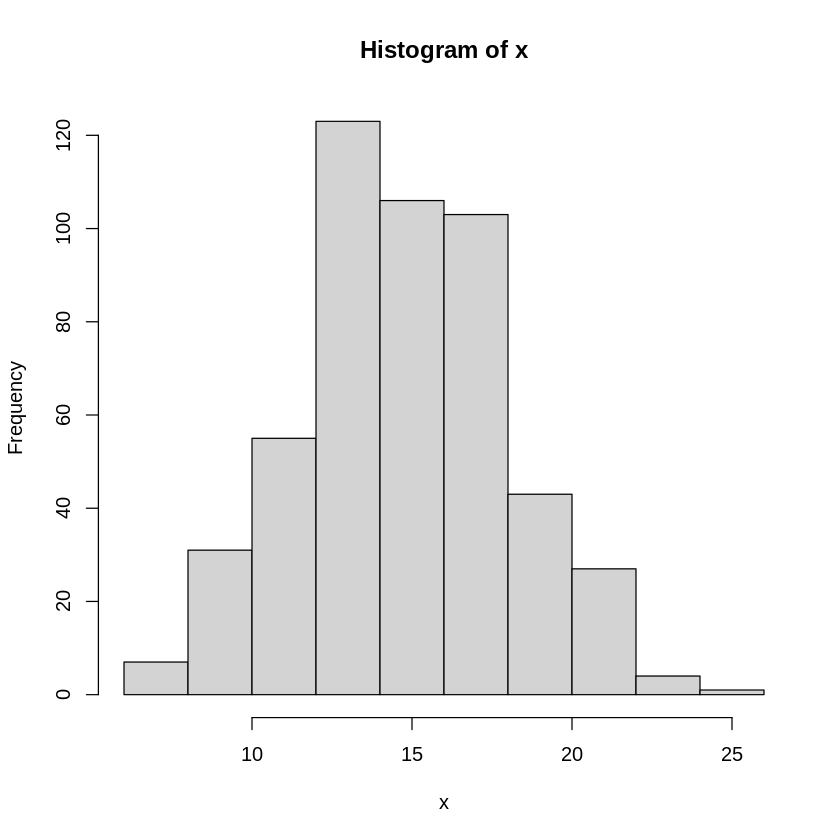

In [ ]:
hist(x)

In [ ]:
# considering the size of our sample, yes it is what i would expect, 
# as a binomial begins to take the shape of a normal when n is large
print(mean(x))
print(sd(x))
var(x)

[1] 15.228
[1] 3.228135


[1] 10.42086

#### (c) Parts (a) and (b) suggest that the binomial distribution can be approximated by a normal distribution (when $np > 10$ and $np(1-p) > 10$, roughly). *Which* normal distribution (i.e., what should the mean and variance of that normal distribution be)? 

This can be described as X ~ N(15,3.2) with a variance of 10.4

## Problem #3

Suppose that $X_1,...,X_n \overset{iid}{\sim} Bernoulli(p)$. When $np > 10$ and $np(1-p) >10$, the following formula represents an approximate $(1-\alpha)\times 100\%$ confidence interval for the population proportion/probability $p$:

$$\widehat{p} \pm z_{\alpha/2}\sqrt{\frac{\widehat{p}(1-\widehat{p})}{n}}.$$

#### (a) Describe why we can use a normal $z$ interval (i.e., why we can use $z_{\alpha/2}$) when the distribution of $\widehat{p} = \frac{\sum^n_{i=1}X_i}{n}$ is, *strictly speaking*, not normal.

By the Central Limit Theorem, as we begin to derive a parameter from certain samples, the set of all those parameters follow a shape of a normal probability distribtuion. When the parameter of interest is know at the population level, then it does not nevesaarily need to follow a normal distribution itself. BUT it's estimate (which we are deriving in the above equation) must follow a normal distribution as the sample size is large.

#### (b) Let $n = 50$ and $p = 0.7$.  Simulate $m = 1,000$ samples of size $n$ from $Bernoulli(p)$. Now forget that you know $p$. Compute an $85\%$ confidence interval for $p$ for each of the $m$ samples using the formula from (a). Print out the first interval, state whether it covers $p$, and interpret the interval.

In [11]:
library(Rlab)

In [90]:
samp <- matrix(nrow=50,ncol=1000)
for(i in 1:1000){
  samp[,i] <- rbern(50,0.7)
}
intervals <- matrix(nrow=1000,ncol=2)
for(i in 1:1000){
  prob <- sum(samp[,i])/nrow(samp)
  alpha <- .15/2
  x <- samp[,i]
  mu <- mean(x)
  sd <- sd(x)
  n <- nrow(samp)
  z <- qnorm(alpha,mean = mu, sd = sd, lower.tail = FALSE)
  vals <- vector(length = 2)
  vals[1] <- prob+(z*sqrt((prob*(1-prob))/n))
  vals[2] <- prob-(z*sqrt((prob*(1-prob))/n))
  intervals[i,] <- vals
}

It does not contain .7! This ok though, as our CI is 85% which implies 150 rows will not contain .7 out of our 1000 CIs.

#### (c) Calculate an estimate of the coverage of the confidence interval using the simulation above. Is it close to 85%? (The Unit #0 Code might help here!)

In [91]:
ciEstimate <- rep(0,1000)
for(i in 1:1000){
  range <- intervals[i,]
  if(.7 >= min(range) & .7 <= max(range)){
    ciEstimate[i] <- 1
  }
}
sum(ciEstimate)/length(ciEstimate)

[1] 0.855

The estimate is right on the money! If we derive this multiple other ways we will get approximately .85 each time as well.


## Problem #4

We might be interested in computing confidence intervals for parameters other than a mean, $\mu$, proportion, $p$, etc. For many of these parameters, standard statistical theory will not help. In this problem, we will compute a 95% confidence interval for the rate parameter of an exponential distribution. 

A theoretical model suggests that $X$, the time to breakdown of an insulating fluid between electrodes at a particular voltage, has an exponential distribution: $f(x; \lambda) = \lambda e^{-\lambda x}$. A random sample of $n = 10$ breakdown times (minutes) is given here:

$$
41.53, 18.73, 2.99, 30.34, 12.33, 117.52, 73.02, 223.63, 4, 26.78.
$$

#### (a)  Construct a matrix of $B = 10,000$ columns, where each column is a sample of size $n = 10$ (sampled with replacement) from the above 10 numbers. (HINT: use the sample function in R.) 


In [104]:
sample <- c(41.53, 18.73, 2.99, 30.34, 12.33, 117.52, 73.02, 223.63, 4, 26.78)
mat <- matrix(nrow=10,ncol=10000)
for(i in 1:10000){
  mat[,i] <- sample(x = sample, size = 10, replace = TRUE)
}
mat

12.33,30.34,41.53,12.33,117.52,12.33,30.34,26.78,223.63,41.53,⋯,30.34,223.63,30.34,41.53,30.34,73.02,30.34,2.99,117.52,2.99
223.63,4.00,73.02,2.99,26.78,30.34,12.33,18.73,117.52,2.99,⋯,41.53,4.00,26.78,18.73,73.02,18.73,30.34,2.99,4.00,26.78
41.53,12.33,223.63,4.00,26.78,26.78,73.02,26.78,4.00,223.63,⋯,18.73,4.00,2.99,223.63,73.02,12.33,12.33,26.78,12.33,2.99
73.02,30.34,117.52,223.63,117.52,73.02,73.02,2.99,30.34,41.53,⋯,41.53,30.34,2.99,18.73,223.63,18.73,117.52,12.33,18.73,18.73
12.33,117.52,30.34,73.02,26.78,4.00,4.00,30.34,2.99,41.53,⋯,26.78,41.53,4.00,73.02,26.78,30.34,117.52,73.02,73.02,12.33
12.33,4.00,18.73,4.00,2.99,30.34,223.63,2.99,73.02,223.63,⋯,18.73,223.63,223.63,117.52,73.02,12.33,73.02,30.34,2.99,30.34
223.63,223.63,4.00,41.53,117.52,4.00,73.02,4.00,73.02,117.52,⋯,30.34,117.52,30.34,41.53,117.52,41.53,41.53,117.52,18.73,117.52
26.78,2.99,2.99,73.02,73.02,30.34,117.52,223.63,18.73,117.52,⋯,2.99,26.78,30.34,26.78,2.99,26.78,26.78,2.99,18.73,73.02
12.33,4.00,2.99,73.02,73.02,30.34,4.00,2.99,41.53,4.00,⋯,223.63,117.52,18.73,41.53,117.52,30.34,12.33,117.52,117.52,4.00
2.99,30.34,73.02,30.34,12.33,4.00,4.00,2.99,12.33,73.02,⋯,117.52,117.52,2.99,4.00,73.02,4.00,26.78,223.63,2.99,117.52


#### (b) From each of the $B$ samples, compute the maximum likelihood estimate of $\lambda$. Call this estimator $\widehat{\lambda}$.


In [105]:
lambdaHat <- rep(0,10000)
for(i in 1:10000){
  lambdaHat[i] <- 1/mean(mat[,i])
}

#### (c) You now have a sample of size $B$ from the *distribution* of the estimator $\widehat{\lambda}$. Construct a histogram and comment on the distribution.


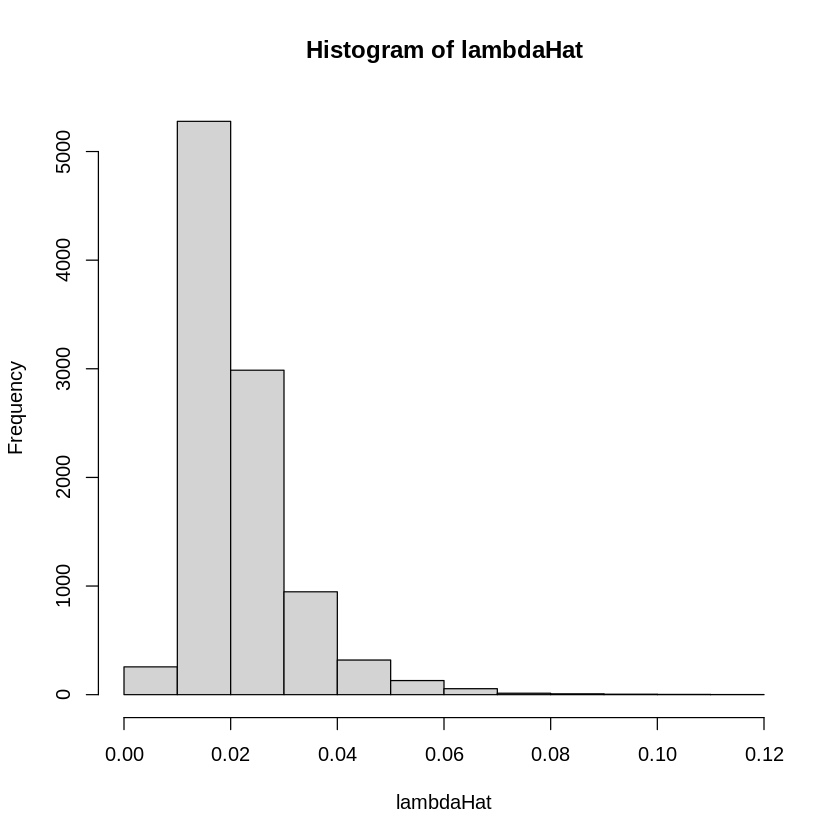

In [106]:
hist(lambdaHat)

#### (d) Use the quantile function in R to find the 2.5 percentile and the 97.5 percentile. This is a *percentile bootstrap confidence interval* for $\lambda$.


In [108]:
boot <- quantile(lambdaHat, probs = c(.025,.975))
boot

2.5%       97.5% 
0.009993257 0.048659081